# <div style="text-align: center; color: cyan">Convolution and relu</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    !git clone https://github.com/LiterallyTheOne/Pytorch_Tutorial.git

    %cd src/9_convolution_relu


## <div style="text-align: center; color: lime">Imports</div>

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision.datasets import MNIST, ImageFolder
from torchvision import transforms

import numpy as np

from matplotlib import pyplot as plt


## <div style="text-align: center; color: lime">Convolution</div>

In [3]:
image_size = (6, 6)
kernel_size = (3, 3)

image = np.arange(image_size[0] * image_size[1]).reshape(image_size)
kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])

print("image:")
print(image)
print("kernel:")
print(kernel)

image:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


## <div style="text-align: center; color: lime">Load MNIST</div>

label : 5
image shape : torch.Size([1, 28, 28])


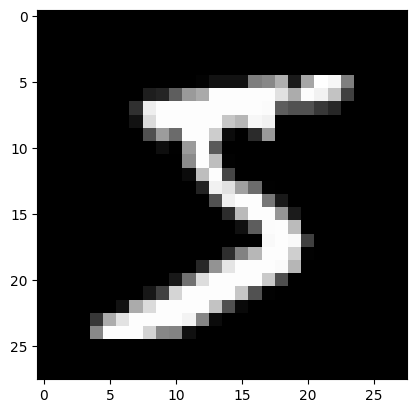

In [4]:
train_data = MNIST("../data/", train=True, download=True, transform=transforms.ToTensor())
test_data = MNIST("../data/", train=False, download=True, transform=transforms.ToTensor())

for image, label in train_data:
    plt.imshow(transforms.ToPILImage()(image), cmap="gray")
    print(f"label : {label}")
    print(f"image shape : {image.shape}")
    break

In [5]:
g1 = torch.Generator().manual_seed(20)
val_data, test_data = random_split(test_data, [0.7, 0.3], g1)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

images, labels = next(iter(train_loader))

print(f"images shape : {images.shape}")
print(f"labels shape : {labels.shape}")

images shape : torch.Size([64, 1, 28, 28])
labels shape : torch.Size([64])


## <div style="text-align: center; color: lime">Convolution</div>

In [6]:
conv_1 = nn.Conv2d(
    in_channels=1,
    out_channels=3,
    kernel_size=3,
    stride=1,
    padding=1,
    dilation=1,
)

In [7]:
result = conv_1(images)
print(f"input shape : {images.shape}")
print(f"output shape : {result.shape}")

input shape : torch.Size([64, 1, 28, 28])
output shape : torch.Size([64, 3, 28, 28])


## <div style="text-align: center; color: lime">ReLU</div>

In [8]:
relu = nn.ReLU()

In [9]:
a1 = torch.arange(-5, 6)
result = relu(a1)

print(f"input: {a1}")
print(f"output: {result}")

input: tensor([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])
output: tensor([0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5])


## <div style="text-align: center; color: lime">Flatten</div>

In [10]:
flatten = nn.Flatten()

In [11]:
a2 = torch.arange(0, 16).reshape((2, 2, 4)).unsqueeze(0)
result = flatten(a2)

print(f"input: {a2}")
print(f"input shape: {a2.shape}")
print(f"output: {result}")
print(f"output shape: {result.shape}")

input: tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7]],

         [[ 8,  9, 10, 11],
          [12, 13, 14, 15]]]])
input shape: torch.Size([1, 2, 2, 4])
output: tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])
output shape: torch.Size([1, 16])


## <div style="text-align: center; color: lime">Make a convolutional model</div>

In [12]:
# -------------------[ Define Model ]-------------------
class IRISClassifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1, stride=2),  # 32x14x14
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=2),  # 64x7x7
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=3),  # 128x3x3
            nn.ReLU(),
        )

        self.classification_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.classification_layers(x)
        return x

In [13]:
model = IRISClassifier()
model(images)

tensor([[-0.0666,  0.0899,  0.0278,  0.0376,  0.0399, -0.0735, -0.0656,  0.0523,
          0.0295, -0.0688],
        [-0.0702,  0.0916,  0.0274,  0.0323,  0.0373, -0.0750, -0.0649,  0.0482,
          0.0333, -0.0717],
        [-0.0688,  0.0921,  0.0258,  0.0338,  0.0331, -0.0727, -0.0670,  0.0508,
          0.0285, -0.0706],
        [-0.0678,  0.0889,  0.0277,  0.0375,  0.0372, -0.0763, -0.0640,  0.0499,
          0.0336, -0.0680],
        [-0.0683,  0.0909,  0.0274,  0.0375,  0.0392, -0.0704, -0.0649,  0.0494,
          0.0320, -0.0694],
        [-0.0638,  0.0934,  0.0329,  0.0355,  0.0363, -0.0746, -0.0606,  0.0511,
          0.0288, -0.0726],
        [-0.0637,  0.0926,  0.0310,  0.0383,  0.0343, -0.0702, -0.0611,  0.0528,
          0.0267, -0.0724],
        [-0.0703,  0.0882,  0.0280,  0.0330,  0.0311, -0.0778, -0.0652,  0.0495,
          0.0327, -0.0745],
        [-0.0613,  0.0909,  0.0251,  0.0369,  0.0304, -0.0694, -0.0717,  0.0472,
          0.0299, -0.0681],
        [-0.0653,  

## <div style="text-align: center; color: lime">Train the model</div>

In [14]:
%run train_mnist_conv.py

mps
--------------------
epoch: 0
train: 
	loss: 0.2567
	accuracy: 0.9219
validation: 
	loss: 0.0748
	accuracy: 0.9757
--------------------
epoch: 1
train: 
	loss: 0.0736
	accuracy: 0.9773
validation: 
	loss: 0.0575
	accuracy: 0.9816
--------------------
epoch: 2
train: 
	loss: 0.0501
	accuracy: 0.9843
validation: 
	loss: 0.0592
	accuracy: 0.9813
--------------------
epoch: 3
train: 
	loss: 0.0363
	accuracy: 0.9887
validation: 
	loss: 0.0389
	accuracy: 0.9859
--------------------
epoch: 4
train: 
	loss: 0.0289
	accuracy: 0.9912
validation: 
	loss: 0.0409
	accuracy: 0.9854
--------------------
test: 
	loss: 0.0465
	accuracy: 0.9863


<div style="text-align: center">

<div>
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</div>

<a style="margin: 1em" href="https://literallytheone.github.io">
https://literallytheone.github.io
</a>

</div>
